
## Communicating Data Science Results

### Visualization - Week 1 Assignment - David Urpani

## Most frequent crimes are also the most unresolved in SF Crime Stats

In [1]:
import graphlab as gl
gl.canvas.set_target('ipynb')

import graphlab.aggregate as agg
import numpy as np
import math
import random
import numpy as np
#import seaborne as sb
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcdefaults()

[INFO] 1452434824 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to /Users/durpani/anaconda/envs/GraphLab1/lib/python2.7/site-packages/certifi/cacert.pem
1452434824 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to durpani@gmail.com and will expire on September 29, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-10782 - Server binary: /Users/durpani/anaconda/envs/GraphLab1/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1452434824.log
[INFO] GraphLab Server Version: 1.7.1


In [2]:
# Loading data

sf = gl.SFrame.read_csv("sanfrancisco_incidents_summer_2014.csv")
#se = gl.SFrame.read_csv("seattle_incidents_summer_2014.csv")

PROGRESS: Finished parsing file /Users/durpani/Dropbox/MyLearning/DataScience/DS_Courses/Data_Science@Scale Spec_UW/Data Science Rept and Visualization/Assign1/sanfrancisco_incidents_summer_2014.csv
PROGRESS: Parsing completed. Parsed 100 lines in 0.429893 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,float,float,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /Users/durpani/Dropbox/MyLearning/DataScience/DS_Courses/Data_Science@Scale Spec_UW/Data Science Rept and Visualization/Assign1/sanfrancisco_incidents_summer_2014.csv
PROGRESS: Parsing completed. Parsed 28993 lines in 0.237807 secs.


### Visually examing San Fransico Crime Data Set

No null data observed.  Date column could be more usefully changed to a Month column and Time to an Hour column.  This is done in the next two sections of this notebook.

In [3]:
sf.show()

In [4]:
# Converting Date column into Month only

date_format_str = '%m-%d-%Y'

def process_date_column(data_sframe):
    """Split the 'date' column of a given sframe"""
    date_col = data_sframe['Date']
    parsed_date = date_col.str_to_datetime(date_format_str)
    parsed_date_sf = parsed_date.split_datetime(column_name_prefix='', limit=['month'])
    for col in ['month']:
        data_sframe[col] = parsed_date_sf[col]
    
process_date_column(sf)

In [5]:
# Converting Time column into Hour only column

date_format_str = '%H:%M'

def process_time_column(data_sframe):
    """Split the 'date' column of a given sframe"""
    date_col = data_sframe['Time']
    parsed_date = date_col.str_to_datetime(date_format_str)
    parsed_date_sf = parsed_date.split_datetime(column_name_prefix='', limit=['hour'])
    for col in ['hour']:
        data_sframe[col] = parsed_date_sf[col]
    
process_time_column(sf)

### Looking at list of crime categories

In [6]:
sf['Category'].unique().sort(ascending=True)

dtype: str
Rows: 34
['ARSON', 'ASSAULT', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']

### Examining frequency of different crime categories

In [7]:
# Sorted Incindent Count
incident_count =sf.groupby(key_columns='Category', operations={'Incident Count' : agg.COUNT('Category')})
incident_count.sort('Incident Count', ascending=False).print_rows(38)                                                      

+-----------------------------+----------------+
|           Category          | Incident Count |
+-----------------------------+----------------+
|        LARCENY/THEFT        |      9466      |
|        OTHER OFFENSES       |      3567      |
|         NON-CRIMINAL        |      3023      |
|           ASSAULT           |      2882      |
|        VEHICLE THEFT        |      1966      |
|           WARRANTS          |      1782      |
|        DRUG/NARCOTIC        |      1345      |
|        SUSPICIOUS OCC       |      1300      |
|        MISSING PERSON       |      1266      |
|       SECONDARY CODES       |      442       |
|         WEAPON LAWS         |      354       |
|           ROBBERY           |      308       |
|           TRESPASS          |      281       |
|            FRAUD            |      242       |
|         DRUNKENNESS         |      147       |
|          KIDNAPPING         |      117       |
|         PROSTITUTION        |      112       |
| DRIVING UNDER THE 

### Using Reduced Crime List

#### The incidence of different crimes seems to have a long tail.  For the purpose of this analysis as it makes the process clearer to understand we will restrict the different crimes to those that have an incidence over 100.  We call this the "reduced_list".

In [8]:
# Creating a reduced list of crime category incidence count based on counts over 100
reduced_list = incident_count[incident_count['Incident Count']>100].sort('Incident Count', ascending=False)
reduced_list.print_rows(38)

+-----------------+----------------+
|     Category    | Incident Count |
+-----------------+----------------+
|  LARCENY/THEFT  |      9466      |
|  OTHER OFFENSES |      3567      |
|   NON-CRIMINAL  |      3023      |
|     ASSAULT     |      2882      |
|  VEHICLE THEFT  |      1966      |
|     WARRANTS    |      1782      |
|  DRUG/NARCOTIC  |      1345      |
|  SUSPICIOUS OCC |      1300      |
|  MISSING PERSON |      1266      |
| SECONDARY CODES |      442       |
|   WEAPON LAWS   |      354       |
|     ROBBERY     |      308       |
|     TRESPASS    |      281       |
|      FRAUD      |      242       |
|   DRUNKENNESS   |      147       |
|    KIDNAPPING   |      117       |
|   PROSTITUTION  |      112       |
+-----------------+----------------+
[17 rows x 2 columns]



### Chart 1: Plot of Most Frequently Occuring Crimes

#### Using the reduced_list of crimes the figure below shows a plot of crime categories by incidence count.

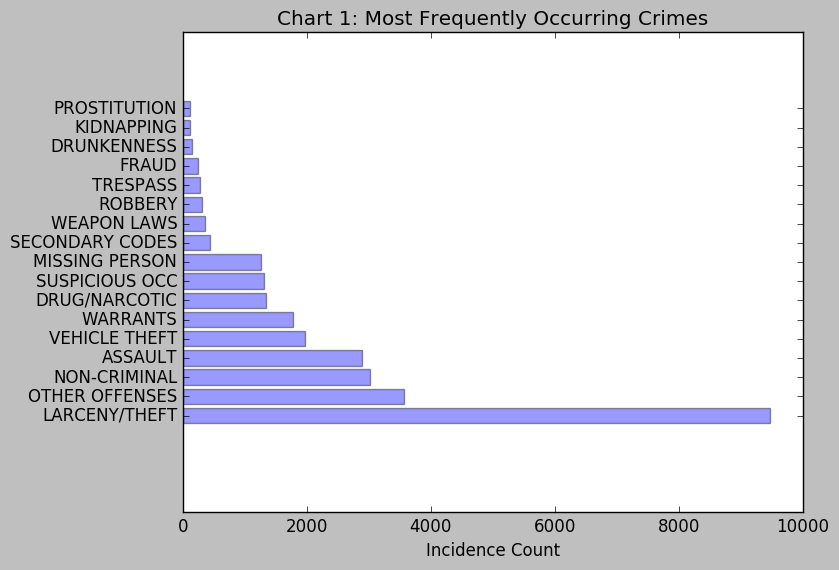

In [9]:
RL = reduced_list['Category']
y_pos = np.arange(len(RL))

performance = reduced_list['Incident Count'].sort(ascending=False)

plt.barh(y_pos, performance, align='center', alpha=0.4)
plt.yticks(y_pos, RL)
plt.xlabel('Incidence Count')
plt.title('Chart 1: Most Frequently Occurring Crimes')
#plt.subtitle('Other Crimes (=34343) not shown')

plt.show()

### Examined Resolved Cases by Crime Category & Incident Count

In [10]:
# Resolved Cases, ordered by Crime Catergory
resolved_list =sf[sf['Resolution'] <> 'NONE'].groupby(key_columns='Category', operations={'Incident Count' : agg.COUNT('Category')})
print "RESOLVED CASES"
resolved_list.sort('Incident Count', ascending=False).print_rows(38)

RESOLVED CASES
+-----------------------------+----------------+
|           Category          | Incident Count |
+-----------------------------+----------------+
|        OTHER OFFENSES       |      2172      |
|           WARRANTS          |      1650      |
|        DRUG/NARCOTIC        |      1231      |
|           ASSAULT           |      1175      |
|        MISSING PERSON       |      981       |
|        LARCENY/THEFT        |      534       |
|         NON-CRIMINAL        |      499       |
|         WEAPON LAWS         |      264       |
|       SECONDARY CODES       |      192       |
|        SUSPICIOUS OCC       |      173       |
|           TRESPASS          |      167       |
|        VEHICLE THEFT        |      132       |
|         DRUNKENNESS         |      121       |
|         PROSTITUTION        |      102       |
| DRIVING UNDER THE INFLUENCE |       90       |
|            FRAUD            |       78       |
|           ROBBERY           |       71       |
|    

### Examining Unresolved Cases b Crime Category & Incident Count

In [11]:
# Unresolved Cases ordered by Incident Count
unresolved_list =sf[sf['Resolution'] == 'NONE'].groupby(key_columns='Category', operations={'Incident Count' : agg.COUNT('Category')})
print "UNRESOLVED CASES:"
unresolved_list.sort('Incident Count', ascending=False).print_rows(38)

UNRESOLVED CASES:
+-----------------------------+----------------+
|           Category          | Incident Count |
+-----------------------------+----------------+
|        LARCENY/THEFT        |      8932      |
|         NON-CRIMINAL        |      2524      |
|        VEHICLE THEFT        |      1834      |
|           ASSAULT           |      1707      |
|        OTHER OFFENSES       |      1395      |
|        SUSPICIOUS OCC       |      1127      |
|        MISSING PERSON       |      285       |
|       SECONDARY CODES       |      250       |
|           ROBBERY           |      237       |
|            FRAUD            |      164       |
|           WARRANTS          |      132       |
|        DRUG/NARCOTIC        |      114       |
|           TRESPASS          |      114       |
|         WEAPON LAWS         |       90       |
|          KIDNAPPING         |       57       |
|            ARSON            |       43       |
|         DRUNKENNESS         |       26       |
| 

### Chart 2: Examing the Top 10 Unresolved Crime Categories

#### The stacked bar chart below shows, for the Top 10 Unresolved Crime Categories, a count of the resolved and unresolved cases.  It is intresting to note that the Top 5 most unresolved crimes are also the Top 5 most frequently ocurring crime categories i.e. Larceny/Theft, Non-criminal, Vehicle Theft, Assault and Other Offences are the most unresolved but also the most frequently ocurring as shown in Chart 1 above.  As a percentage, the first four of these Top 5 crimes also have a very low percentage resolution.  The question that begs answering is: are these crimes the most frequent because their resolution is so low (for whatever reason eg lack of resources, lack of focus on these crimes)?

#### As a percentage Larceny/Theft is resolved only 534/8932 = 6% and Vehicle Theft 132/1834 = 7.2% of the times.

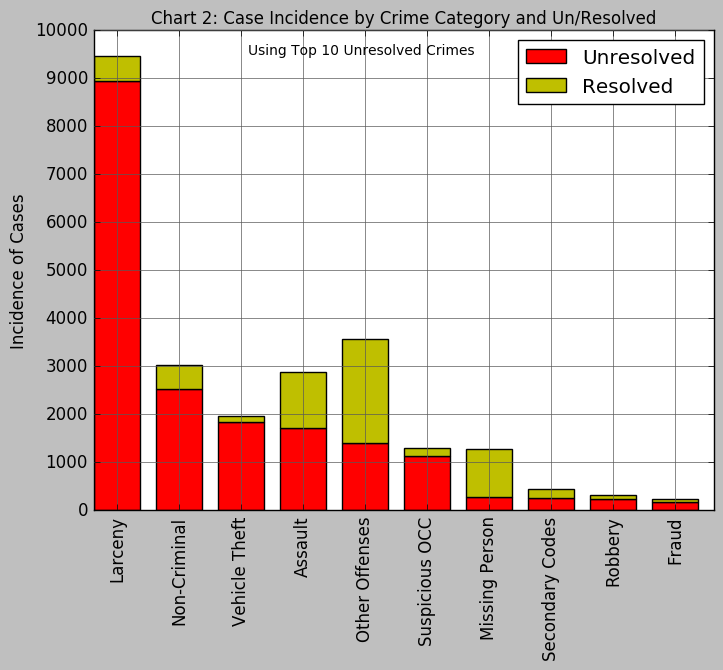

In [12]:
#import numpy as np
#import matplotlib.pyplot as plt

N = 10 # Because we are using Top 10

unresolved_T10 = (8932, 2524, 1834, 1707, 1395, 1127, 285, 250, 237, 164)
resolved_T10 = (534, 499, 132, 1175, 2172, 173, 981, 192, 71, 78)

ind = np.arange(N)    # the x locations for the groups
width = 0.75       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, unresolved_T10, width, color='r')
p2 = plt.bar(ind, resolved_T10, width, color='y',
             bottom=unresolved_T10)

plt.figtext(.46,.86,'Using Top 10 Unresolved Crimes',fontsize=10,ha='center')
plt.grid(b=True, which='major', color='0.35',linestyle='-')
plt.ylabel('Incidence of Cases')
plt.title('Chart 2: Case Incidence by Crime Category and Un/Resolved', fontsize=12, ha='center')
plt.xticks(ind + width/2, ('Larceny', 'Non-Criminal', 'Vehicle Theft', 'Assault', 'Other Offenses', 'Suspicious OCC', 'Missing Person', 'Secondary Codes', 'Robbery', 'Fraud'), rotation='vertical')
plt.yticks(np.arange(0, 11000, 1000))
plt.legend((p1[0], p2[0]), ('Unresolved', 'Resolved'))

plt.show()

## Which Districts are the most crime ridden?

### Examining the incidence of crime by District

#### As a means of understanding which Districts are prone to Crime we coded below to extract a ranked list of Districts based on their appearance in the Top 3 places of crime incidence for each crime in the reduced_list.  This is then displayed graphically in Chart 3 below.  The districts of Mission and Southern are the two top contenders for the most crime plagued districts across all categories of crime with Bayview coming distant third (see Chart 3). 

In [13]:
# Calculating the districts with

Crime_list = sf['Category'].unique()
Crime_list_reduced = reduced_list['Category'].unique()

# Create function to rank districts by the incidence of a given crime
def rank_crime_by_district(crime):
    incident_count_by_crime = sf[sf['Category']==crime].groupby(key_columns='PdDistrict', operations={'Incident Count' : agg.COUNT('Category')})
    return(incident_count_by_crime.sort('Incident Count', ascending=False))

# Create function to count rank of district for a given ranked list of incident count
district_list = []
def count_districts(ranked_district_list):
        
    district_list = []
    district1 = []
    district2 = []
    district3 = []
    
    district1 = ranked_district_list['PdDistrict'][0]
    district2 = ranked_district_list['PdDistrict'][1]
    district3 = ranked_district_list['PdDistrict'][2]
        
    district_list.append(district1)
    district_list.append(district2)
    district_list.append(district3)   
    return(district_list)

district_list_total = []
for i in range(len(Crime_list_reduced)):
    append_districts=[]
    ranked_district_list = rank_crime_by_district(Crime_list_reduced[i])
    append_districts = count_districts(ranked_district_list)
    district_list_total.append(append_districts)

from collections import Counter
flattened_district_list_total = [item for sublist in district_list_total for item in sublist]
print 'Districts with Highest Occurrence in Top 3 of Crime Incidence List for all Crime Categories: '
print Counter(flattened_district_list_total).most_common(5)

Districts with Highest Occurrence in Top 3 of Crime Incidence List for all Crime Categories: 
[('MISSION', 14), ('SOUTHERN', 13), ('BAYVIEW', 8), ('CENTRAL', 7), ('NORTHERN', 3)]


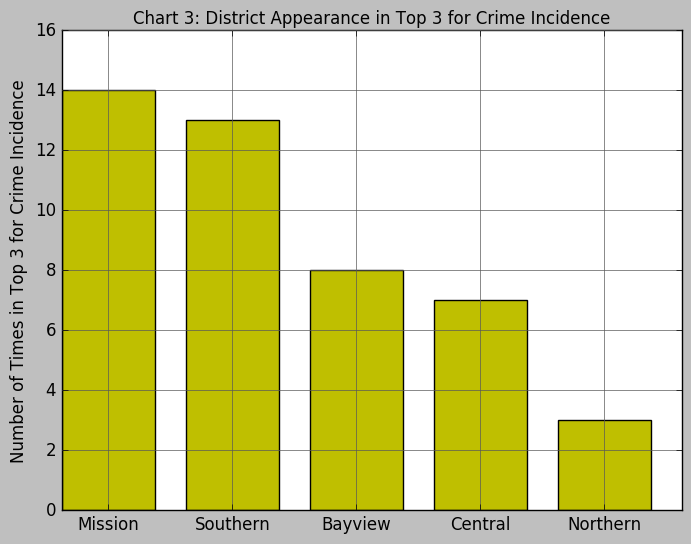

In [14]:
N = 5 # Because there are 5 Districts that feature in Top 3 list

Top3_List = (14, 13, 8, 7, 3)

ind = np.arange(N)    # the x locations for the groups
width = 0.75       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Top3_List, width, color='y')

plt.grid(b=True, which='major', color='0.35',linestyle='-')
plt.ylabel('Number of Times in Top 3 for Crime Incidence')
plt.title('Chart 3: District Appearance in Top 3 for Crime Incidence', fontsize=12, ha='center')
plt.xticks(ind + width/2, ('Mission', 'Southern', 'Bayview', 'Central', 'Northern'))
plt.yticks(np.arange(0, 18, 2))
plt.show()

#### The tables below examine in a bit more detail the types of crime shared by the three districts of Mission, Southern and Bayview.  As the tables below show the crimes shared by these top 3 ranking districts are Larceny/Theft, Other Offences, Assault, Non-Criminal, Vehcile Theft and Warrants.  Southern district has the top incidence of crime for Larceny/Theft, Assauls, Warrants and Non-Criminal.

In [15]:
# Group Crime by District ('PdDistrict')
district = 'MISSION'
incident_count_by_district =sf[sf['PdDistrict']==district].groupby(key_columns='Category', operations={'Incident Count' : agg.COUNT('Category')})
print district
print incident_count_by_district.sort('Incident Count', ascending=False).print_rows(5)                      

MISSION
+----------------+----------------+
|    Category    | Incident Count |
+----------------+----------------+
| LARCENY/THEFT  |      671       |
| OTHER OFFENSES |      502       |
|    ASSAULT     |      459       |
|  NON-CRIMINAL  |      345       |
| VEHICLE THEFT  |      306       |
+----------------+----------------+
[30 rows x 2 columns]

None


In [16]:
# Group Crime by District ('PdDistrict')
district = 'SOUTHERN'
incident_count_by_district =sf[sf['PdDistrict']==district].groupby(key_columns='Category', operations={'Incident Count' : agg.COUNT('Category')})
print district
print incident_count_by_district.sort('Incident Count', ascending=False).print_rows(5)                      

SOUTHERN
+----------------+----------------+
|    Category    | Incident Count |
+----------------+----------------+
| LARCENY/THEFT  |      2562      |
|  NON-CRIMINAL  |      639       |
| OTHER OFFENSES |      543       |
|    ASSAULT     |      528       |
|    WARRANTS    |      331       |
+----------------+----------------+
[29 rows x 2 columns]

None


In [17]:
# Group Crime by District ('PdDistrict')
district = 'BAYVIEW'
incident_count_by_district =sf[sf['PdDistrict']==district].groupby(key_columns='Category', operations={'Incident Count' : agg.COUNT('Category')})
print district
print incident_count_by_district.sort('Incident Count', ascending=False).print_rows(5)                      

BAYVIEW
+----------------+----------------+
|    Category    | Incident Count |
+----------------+----------------+
| LARCENY/THEFT  |      481       |
| OTHER OFFENSES |      435       |
|    ASSAULT     |      359       |
|    WARRANTS    |      249       |
| VEHICLE THEFT  |      245       |
+----------------+----------------+
[27 rows x 2 columns]

None


In [18]:
# Group District by Crime Incidence for a given Crime
crime = 'LARCENY/THEFT'
incident_count_by_crime =sf[sf['Category']==crime].groupby(key_columns='PdDistrict', operations={'Incident Count' : agg.COUNT('Category')})
incident_count_by_crime.sort('Incident Count', ascending=False).print_rows(3)                            

+------------+----------------+
| PdDistrict | Incident Count |
+------------+----------------+
|  SOUTHERN  |      2562      |
|  CENTRAL   |      1574      |
|  NORTHERN  |      1499      |
+------------+----------------+
[10 rows x 2 columns]



In [19]:
# Group District by Crime Incidence for a given Crime
crime = 'NON-CRIMINAL'
incident_count_by_crime =sf[sf['Category']==crime].groupby(key_columns='PdDistrict', operations={'Incident Count' : agg.COUNT('Category')})
incident_count_by_crime.sort('Incident Count', ascending=False).print_rows(3)                            

+------------+----------------+
| PdDistrict | Incident Count |
+------------+----------------+
|  SOUTHERN  |      639       |
|  CENTRAL   |      431       |
|  NORTHERN  |      347       |
+------------+----------------+
[10 rows x 2 columns]



In [20]:
# Group District by Crime Incidence for a given Crime
crime = 'ASSAULT'
incident_count_by_crime =sf[sf['Category']==crime].groupby(key_columns='PdDistrict', operations={'Incident Count' : agg.COUNT('Category')})
incident_count_by_crime.sort('Incident Count', ascending=False).print_rows(3)

+------------+----------------+
| PdDistrict | Incident Count |
+------------+----------------+
|  SOUTHERN  |      528       |
|  MISSION   |      459       |
|  BAYVIEW   |      359       |
+------------+----------------+
[10 rows x 2 columns]



In [21]:
# Group District by Crime Incidence for a given Crime
crime = 'WARRANTS'
incident_count_by_crime =sf[sf['Category']==crime].groupby(key_columns='PdDistrict', operations={'Incident Count' : agg.COUNT('Category')})
incident_count_by_crime.sort('Incident Count', ascending=False).print_rows(3)

+------------+----------------+
| PdDistrict | Incident Count |
+------------+----------------+
|  SOUTHERN  |      331       |
|  MISSION   |      281       |
|  BAYVIEW   |      249       |
+------------+----------------+
[10 rows x 2 columns]

